<a href="https://colab.research.google.com/github/OseiasBeu/Data-Science/blob/master/K_Nearest_Neighbors_Projeto_Os%C3%A9ias_Beu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors - Projeto 

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [7]:
wb = pd.read_csv('https://raw.githubusercontent.com/OseiasBeu/Data-Science/master/DataSets/KNN_Project_Data',sep =',')
df = pd.DataFrame(wb)

** Verifique o cabeçalho do DataFrame.**

In [47]:
print(df.head(5))
print(df.columns)

          XVPM         GWYH  ...         JHZC  TARGET CLASS
0  1636.670614   817.988525  ...   845.136088             0
1  1013.402760   577.587332  ...   861.081809             1
2  1300.035501   820.518697  ...  1647.186291             1
3  1059.347542  1066.866418  ...  1450.935357             0
4  1018.340526  1313.679056  ...  1899.850792             0

[5 rows x 11 columns]
Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')


# Análise exploratória de dados

Uma vez que esses dados são artificiais, vamos criar um grande pairplot com o Seaborn.

** Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna TARGET CLASS. **

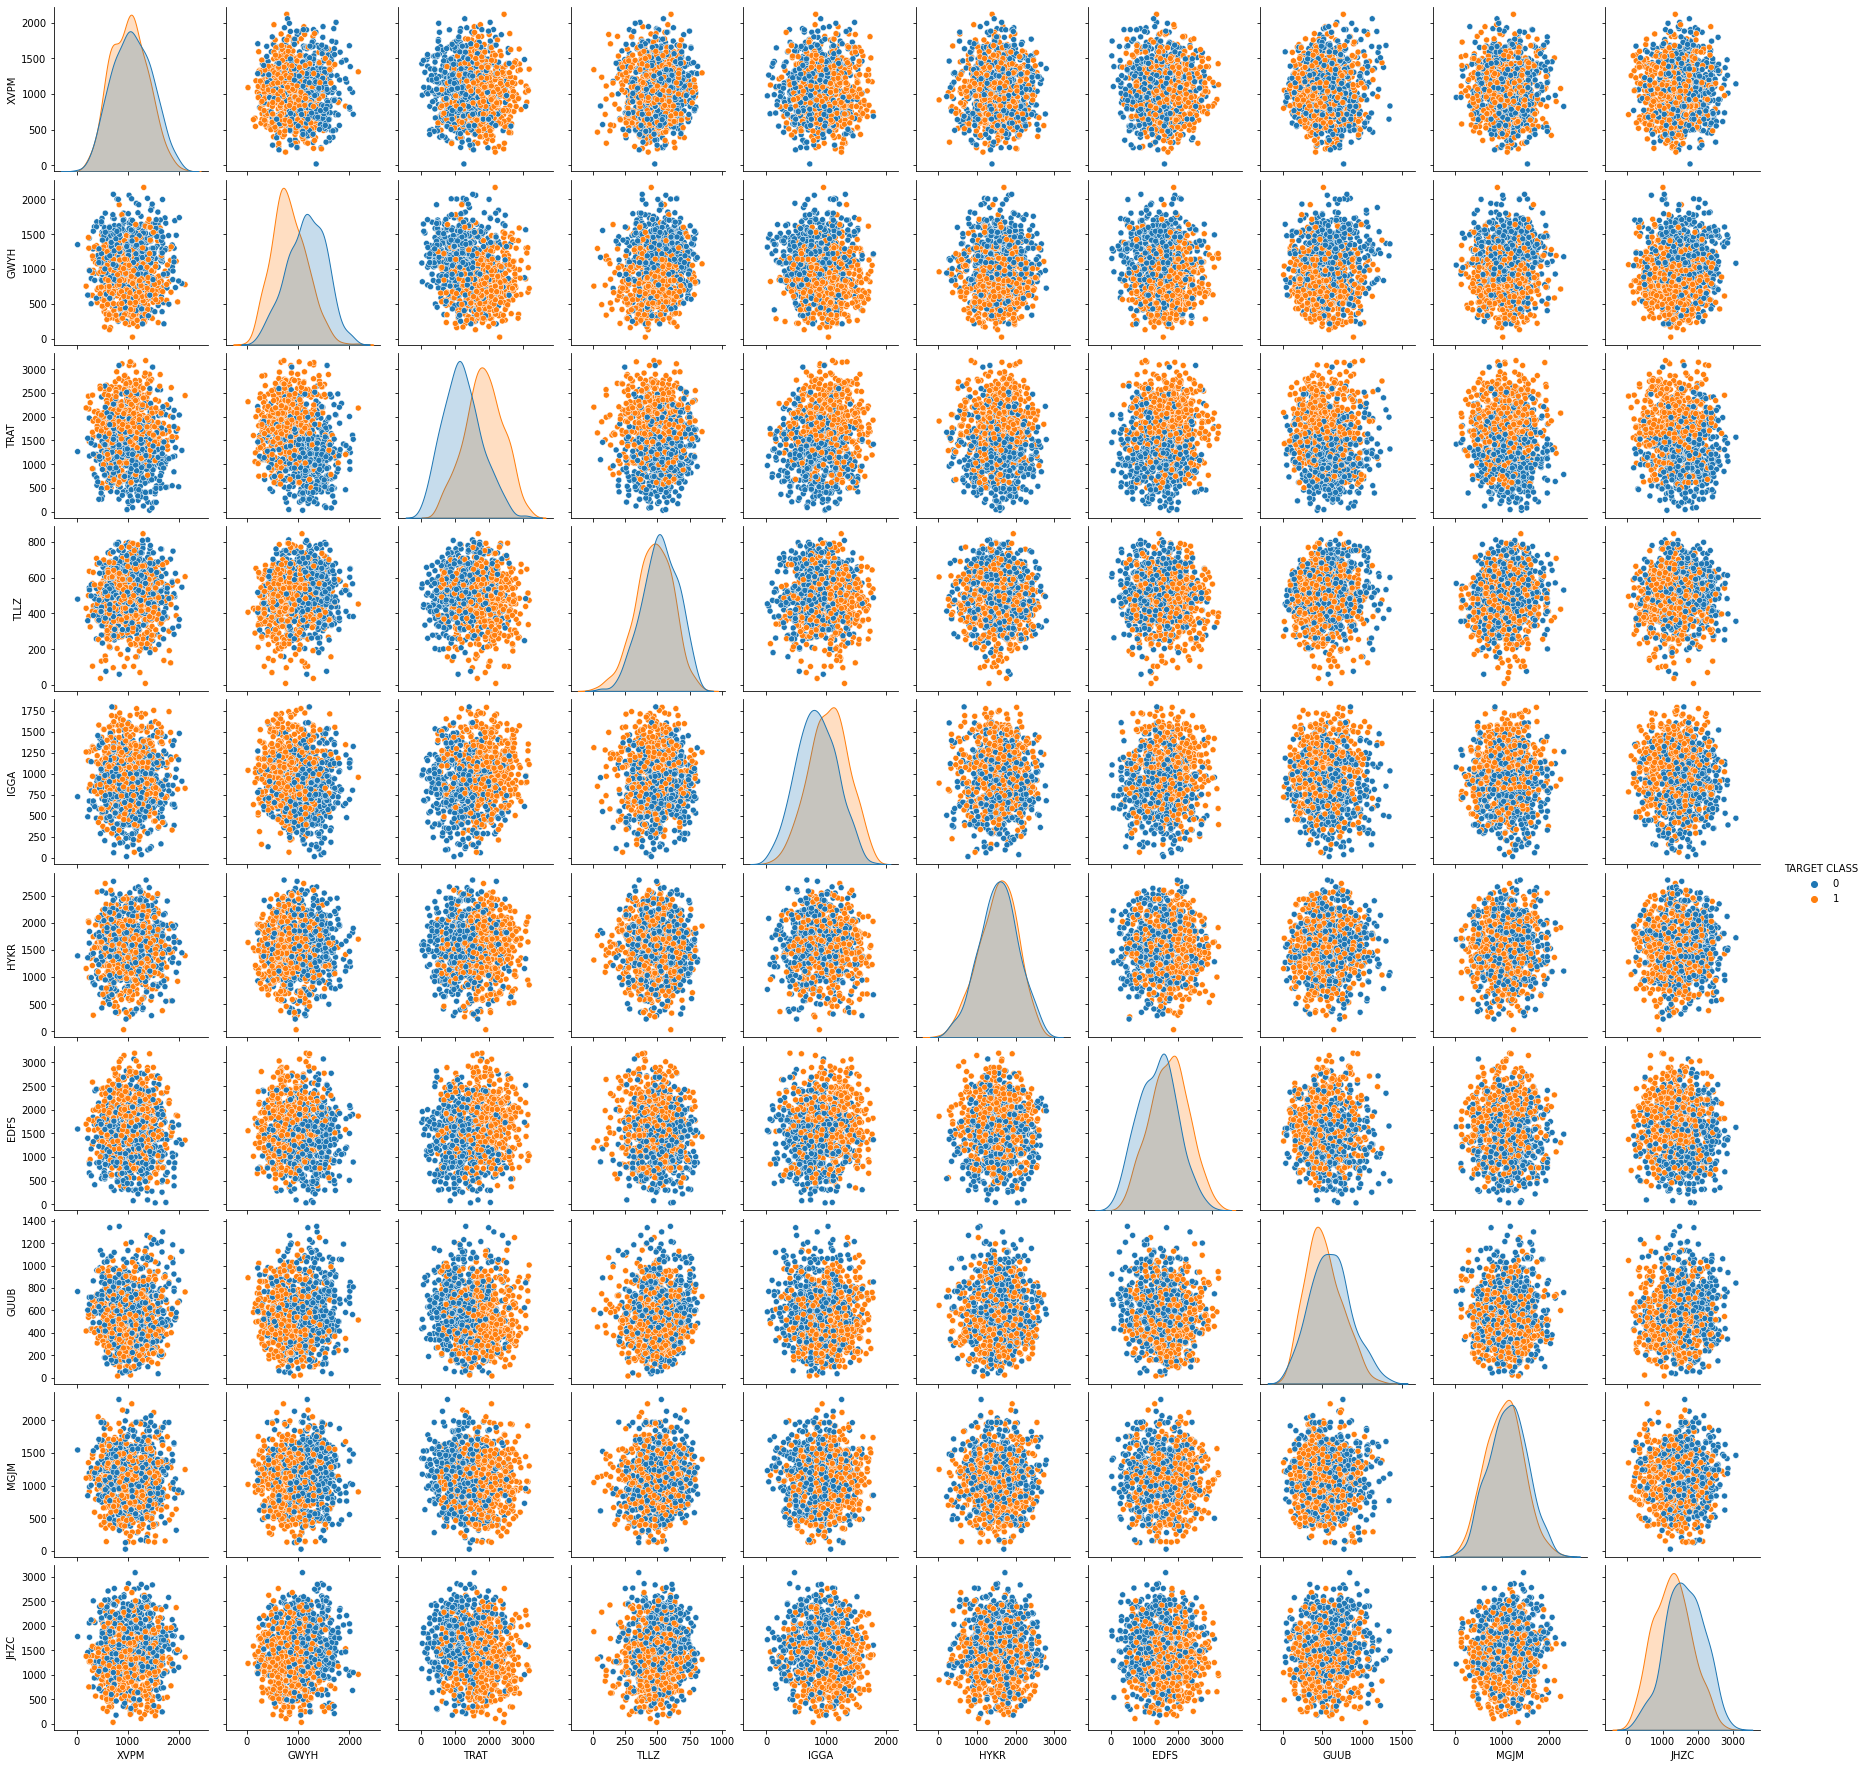

In [10]:
sns.pairplot(df, hue='TARGET CLASS')

# Padronize as variáveis

Hora de para padronizar as variáveis.

** Import StandardScaler do Scikit-learn. **

In [11]:
from sklearn.preprocessing import StandardScaler

** Crie um objeto StandardScaler() chamado scaler. **

In [12]:
scaler = StandardScaler()

** Use o método fit() do objeto para treinar o modelo. **

** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **

In [27]:
X = df.drop(['TARGET CLASS'], axis=1)
y = df['TARGET CLASS']

df_scaled = scaler.fit_transform(X)

** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **

In [28]:
df2 = pd.DataFrame(df_scaled)
df2.head(5)

,0,1,2,3,4,5,6,7,8,9
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df["TARGET CLASS"], test_size=0.2, random_state=111)

# Usando o KNN

** Importe o KNeighborClassifier do scikit learn. **

In [31]:
from sklearn.neighbors import KNeighborsClassifier

** Crie uma instância do modelo KNN com n_neighbors = 1 **

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

** Ajuste este modelo KNN aos dados de treinamento. **

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

** Use o método de previsão para prever valores usando seu modelo KNN e X_test. **

In [34]:
pred = knn.predict(X_test)

** Crie uma matriz de confusão e um relatório de classificação. **

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(y_test, pred))

[[68 36]
 [21 75]]


In [40]:
'''
Para melhor visualização gosto de gerar
 a matriz de confusão desta forma.
 '''
print(pd.crosstab(y_test,pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0    1  All
Real                 
0        68   36  104
1        21   75   96
All      89  111  200


In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       104
           1       0.68      0.78      0.72        96

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

** Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa. **

In [41]:
error_rate = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.sum((y_test != pred) / len(pred)))

print(error_rate)

[0.28500000000000003, 0.21000000000000002, 0.195, 0.17, 0.19, 0.18500000000000003, 0.2, 0.20500000000000002, 0.21000000000000002, 0.22, 0.215, 0.21, 0.205, 0.19, 0.185, 0.185, 0.18, 0.185, 0.18000000000000002, 0.17, 0.17, 0.17500000000000002, 0.17, 0.155, 0.17, 0.16, 0.165, 0.165, 0.16, 0.16000000000000003, 0.165, 0.17, 0.165, 0.16000000000000003, 0.17500000000000002, 0.17500000000000002, 0.17, 0.17500000000000002, 0.17500000000000002, 0.17, 0.18, 0.16999999999999998, 0.18, 0.17, 0.18, 0.175, 0.175, 0.17, 0.165]


** Agora crie o seguinte gráfico usando as informações do seu loop. **

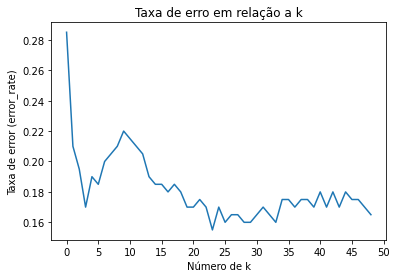

In [42]:
fig, ax = plt.subplots(1,1)
plt.plot(error_rate)
ax.xaxis.set_ticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.xlabel("Número de k")
plt.ylabel("Taxa de error (error_rate)")
plt.title("Taxa de erro em relação a k")
plt.show()

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [45]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print('##########################################')
print(pd.crosstab(y_test,pred, rownames=['Real'], colnames=['Predito'], margins=True))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       104
           1       0.80      0.86      0.83        96

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

##########################################
Predito   0    1  All
Real                 
0        83   21  104
1        13   83   96
All      96  104  200
